In [ ]:
# UCD Data Boot Camp - HW5 Matplotlib by: (David Lai / Kwai Hei Lai)
## Observations and Insights 
# 1) number of male and female are almost exactly the same... may be this is done on purpose to rule out or observe gender specific issues 
# 2) Tumor Vol can actually increase... meaning that specific drug regimen made the situation worse or no effect at all (thus tumor cont' to grow)
# 3) Not that many drug regimens are effective... Only Capomulin and Ramicane shown improvments.

In [214]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

merged_df = pd.merge(mouse_metadata,study_results)
# verify data in excel
merged_df.to_csv("merged-mouse-data.csv", encoding="utf-8", index=False)
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [28]:
# Checking the number of mice in the DataFrame.
grouped_df = merged_df.groupby(['Mouse ID'])
len(grouped_df)


249

In [ ]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 


In [ ]:
# Optional: Get all the data for the duplicate mouse ID. 


In [29]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
merged_df = merged_df.dropna()

In [30]:
# Checking the number of mice in the clean DataFrame.
grouped_df = merged_df.groupby(['Mouse ID','Drug Regimen'])['Tumor Volume (mm3)'].agg(['sum','mean','median','count'])

grouped_df

,,sum,mean,median,count
Mouse ID,Drug Regimen,,,,
a203,Infubinol,563.127077,56.312708,55.983272,10
a251,Infubinol,552.370946,55.237095,55.938620,10
a262,Placebo,586.116306,58.611631,58.572588,10
a275,Ceftamin,527.709651,52.770965,52.044750,10
a366,Stelasyn,382.479341,54.639906,55.265582,7
...,...,...,...,...,...
z435,Propriva,140.826641,46.942214,47.115980,3
z578,Ramicane,384.115100,38.411510,38.160380,10
z581,Infubinol,539.795837,53.979584,53.062175,10


## Summary Statistics

In [31]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
grouped_df = merged_df.groupby(['Drug Regimen'])

mean = grouped_df['Tumor Volume (mm3)'].mean()
median = grouped_df['Tumor Volume (mm3)'].median()
var = grouped_df['Tumor Volume (mm3)'].var()
std = grouped_df['Tumor Volume (mm3)'].std()
sem = grouped_df['Tumor Volume (mm3)'].sem()

grouped_df = pd.DataFrame({'mean':mean,
                           'median':median,
                           'var':var,
                           'std':std,
                           'sem':sem})
grouped_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [32]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grouped_df = merged_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])

grouped_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

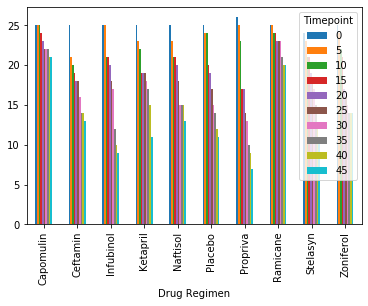

In [71]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.

#grouped_df = merged_df.groupby(['Drug Regimen','Timepoint'], as_index=False)['Mouse ID'].agg(['count']).plot(kind='bar')

#merged_df.groupby(['Drug Regimen'], as_index=False)['Mouse ID'].agg(['count']).plot(kind='bar')

merged_df.groupby(['Drug Regimen','Timepoint']).count()['Mouse ID'].unstack().plot.bar()


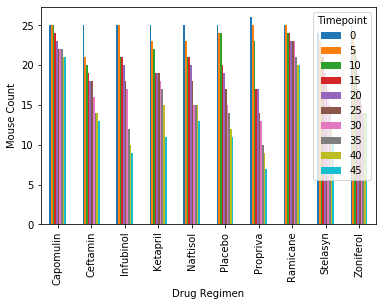

<Figure size 432x288 with 0 Axes>

In [78]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

# Create a group based on the values in the 'maker' column
drug_group = merged_df.groupby(['Drug Regimen','Timepoint'])

# Count how many times each maker appears in our group
mouse_count = drug_group['Mouse ID'].count()

# Create a bar chart based off of the group series from before
count_chart = mouse_count.unstack().plot(kind='bar')

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Drug Regimen")
count_chart.set_ylabel("Mouse Count per Timepoint")

plt.show()
plt.tight_layout()

## Pie Plots

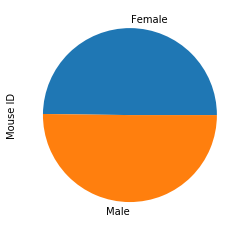

In [84]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
merged_df.groupby('Sex').nunique()['Mouse ID'].plot.pie()

Sex
Female    935
Male      958
Name: Mouse ID, dtype: int64
Sex
Female    124
Male      125
Name: Mouse ID, dtype: int64


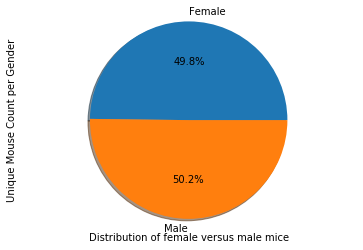

In [224]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Create a group based on the values in the 'maker' column
gender_group = merged_df.groupby('Sex')

# Count how many times each mouse appears in our group
mouse_count = gender_group['Mouse ID'].count()
unique_count = gender_group['Mouse ID'].nunique()
print(mouse_count)
print(unique_count)

# Create a pie chart based off of the group series from before
count_chart = unique_count.plot(kind='pie',autopct="%1.1f%%", shadow=True)

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Distribution of female versus male mice")
count_chart.set_ylabel("Unique Mouse Count per Gender")

plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

The lower quartile of tumor volume is: 40.6583443125
The upper quartile of tumor volume is: 68.8702959775
The interquartile range of tumor volume is: 28.211951665000008
The the median of tumor volume is: 63.53754596 
Values below -1.6595831850000096 could be outliers.
Values above 111.18822347500002 could be outliers.


0

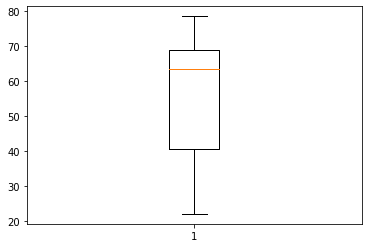

In [172]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

# drop all records except the final tumor volume
cleaned_df = merged_df.loc[merged_df['Timepoint']==45]
cleaned_df = cleaned_df.sort_values(by='Tumor Volume (mm3)', ascending=True)

#cleaned_df = cleaned_df.groupby(['Drug Regimen'])
tumor_vol = cleaned_df['Tumor Volume (mm3)']
tumor_vol.head()
#cleaned_df.first().sort_values(by='Tumor Volume (mm3)', ascending=True)
#print([cleaned_df].sort_values(by='Tumor Volume (mm3)'))
#merged_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['count'])

# IQR = Q3 - Q1 (upper:75th and lower:25th percentiles)
quartiles = tumor_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_o = cleaned_df.loc[(cleaned_df['Tumor Volume (mm3)'] < lower_bound) | (cleaned_df['Tumor Volume (mm3)'] > upper_bound) ]
outlier_o.size

{'whiskers': [<matplotlib.lines.Line2D at 0x1c081ac8>,
 'caps': [<matplotlib.lines.Line2D at 0x1c046248>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c095e48>],
 'medians': [<matplotlib.lines.Line2D at 0x1c05f688>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c05c948>],
 'means': []}

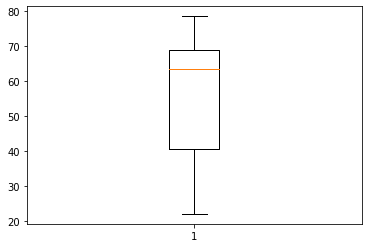

In [173]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.boxplot(tumor_vol)

## Line and Scatter Plots

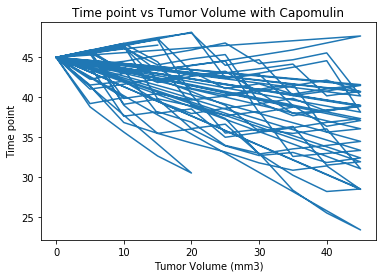

<Figure size 432x288 with 0 Axes>

In [195]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
cleaned_df = merged_df.loc[merged_df['Drug Regimen']=='Capomulin']

tumor = cleaned_df['Tumor Volume (mm3)']
#tumor.head()

time = cleaned_df['Timepoint']
#time.head()

plt.title("Time point vs Tumor Volume with Capomulin")
plt.ylabel("Time point")
plt.xlabel("Tumor Volume (mm3)")

plt.plot(time, tumor)

plt.show()
plt.tight_layout()

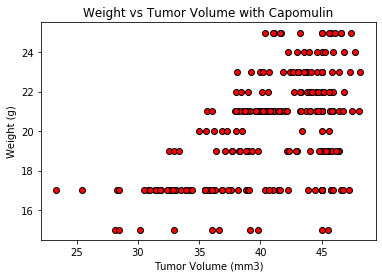

<Figure size 432x288 with 0 Axes>

In [198]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
cleaned_df = merged_df.loc[merged_df['Drug Regimen']=='Capomulin']

tumor = cleaned_df['Tumor Volume (mm3)']
#tumor.head()

weight = cleaned_df['Weight (g)']
#time.head()

plt.title("Weight vs Tumor Volume with Capomulin")
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Weight (g)")

plt.scatter(tumor, weight, marker="o", facecolors="red", edgecolors="black")

plt.show()
plt.tight_layout()


## Correlation and Regression

In [227]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
cleaned_df = merged_df.loc[merged_df['Drug Regimen']=='Capomulin']

# t = cleaned_df.iloc[:,4]
tumor = cleaned_df['Tumor Volume (mm3)']
#print(tumor)

# w = cleaned_df.iloc[:,6]
weight = cleaned_df['Weight (g)']
#time.head()

correlation = st.pearsonr(tumor,weight)

print(f"The correlation between both factors is {round(correlation[0],2)}")


The correlation between both factors is 0.53


slope = 0.2875853579447794
intercept = 8.26746981560067
rvalue = 0.5256995552077169
pvalue = 9.605446629501521e-18
stderr = 0.03081931724902991
The r-squared is: 0.2763600223455914


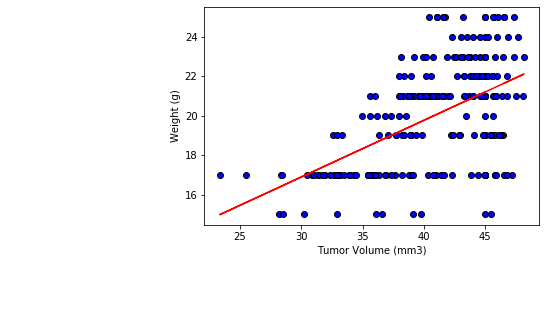

In [232]:

x_values = cleaned_df['Tumor Volume (mm3)']
y_values = cleaned_df['Weight (g)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
print(f"slope = {slope}")
print(f"intercept = {intercept}")
print(f"rvalue = {rvalue}")
print(f"pvalue = {pvalue}")
print(f"stderr = {stderr}")

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="o", facecolors="blue", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (6,10), fontsize=25, color="red")
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Weight (g)')
print(f"The r-squared is: {rvalue**2}")
plt.show()
#plt.tight_layout()